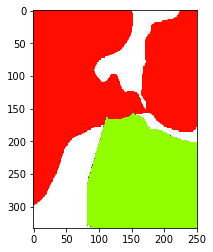

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import os 

im_name = "Road_in_niigata_L.jpg"

im = cv2.imread(im_name)

plt.imshow(im[:,:,::-1])

In [3]:
	Obstacles = [225, 13, 0]
	path_robot = [149, 255, 0]
	background = [255, 255, 255]
label_colours = np.array([Obstacles, path_robot, background, background])

label_colours.shape[0]

4

In [2]:
#Methods to sort as human expect
import re

def tryint(s):
    try:
        return int(s)
    except:
        return s
    
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)
    


# ----------------------------------------------------------------

In [6]:
im.shape

(333, 250, 3)

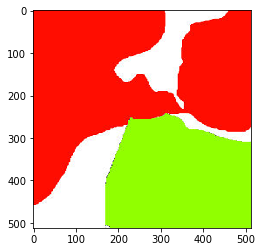

In [8]:
## Resize test

img_cols = img_rows = 512

resized = cv2.resize(im ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)

plt.imshow(resized[:,:,::-1])

# Replace labels images names to have the same original image's name

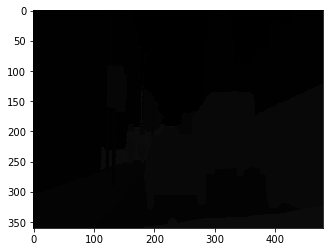

In [5]:
im_label = cv2.imread("0001TP_006690.png")

plt.imshow(im_label[:,:,::-1])

In [4]:
# Check image label form

print("Shape" , im_label.shape)
print("min" , im_label.min())
print("max" , im_label.max())
print("mean" , im_label.mean())

#Es una imagen cuyos valores van de 0 a 11, 
#cada valor represeta una clase, y todos los pixeles de la imagen tienen el valor de una de las clases

('Shape', (360, 480, 3))
('min', 0)
('max', 11)
('mean', 3.5444386574074076)


In [11]:
im_label[-1,-1,:]

array([11, 11, 11], dtype=uint8)

In [57]:
train_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train"
train_labels_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_not"

all_names_train = os.listdir(train_path)

sort_nicely(all_names_train)  


In [65]:
all_names_train_labels = os.listdir(train_labels_path)

sort_nicely(all_names_train_labels)  


In [63]:
#Change the labels images names to have the same name that the train images

save_label_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels" 

for filename in all_names_train_labels:
    #print(filename)
    #Image path
    filePath = os.path.join(train_labels_path, filename)
    #Read image
    im_l = cv2.imread(filePath)
    
    #define new name
    new_name = filename
    
    for char in new_name:
        if char in " L_":
            new_name = new_name.replace(char,'')
    print(new_name) 
    
    #Save Image
    cv2.imwrite( os.path.join(save_label_path, new_name) , im_l)

print("All images saved")

frame0000.jpg
frame0020.jpg
frame0024.jpg
frame0026.jpg
frame0027.jpg
frame0029.jpg
frame0032.jpg
frame0035.jpg
frame0045.jpg
frame0047.jpg
frame0049.jpg
frame0055.jpg
frame0058.jpg
frame0064.jpg
frame0069.jpg
frame0073.jpg
frame0077.jpg
frame0082.jpg
frame0087.jpg
frame0092.jpg
frame0096.jpg
frame0098.jpg
frame0103.jpg
frame0106.jpg
frame0108.jpg
frame0112.jpg
frame0116.jpg
frame0120.jpg
frame0123.jpg
frame0126.jpg
frame0128.jpg
frame0130.jpg
frame0133.jpg
frame0135.jpg
frame0137.jpg
frame0139.jpg
frame0141.jpg
frame0146.jpg
frame0149.jpg
frame0154.jpg
frame0156.jpg
frame0159.jpg
frame0161.jpg
frame0165.jpg
frame0168.jpg
frame0170.jpg
frame0172.jpg
frame0174.jpg
frame0177.jpg
frame0180.jpg
frame0184.jpg
frame0187.jpg
frame0190.jpg
frame0194.jpg
frame0198.jpg
frame0200.jpg
frame0203.jpg
frame0206.jpg
frame0209.jpg
frame0212.jpg
frame0215.jpg
frame0217.jpg
frame0222.jpg
frame0226.jpg
frame0230.jpg
frame0233.jpg
frame0236.jpg
frame0239.jpg
frame0242.jpg
frame0244.jpg
frame0246.jpg
frame0

# -------------------------------------------------------------------------------

# Transform label images to one channel with discrete values

frame0000.jpg


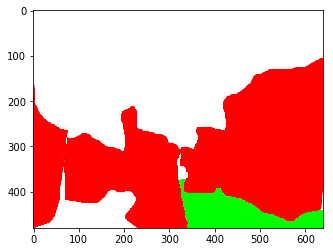

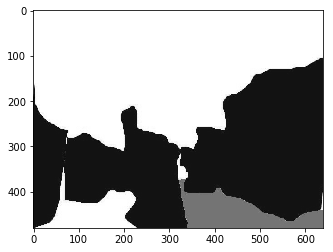

(480, 640)


In [47]:
train_labels_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_RGB" 
#Get image labels file names
all_names_train_labels = os.listdir(train_labels_path)
sort_nicely(all_names_train_labels)

#Show an example image 
filename =  all_names_train_labels[0]
print(filename)
filePath = os.path.join(train_labels_path, filename)
#Read image
im_l = cv2.imread(filePath)
#RGb_to_gray
gray = cv2.cvtColor(im_l, cv2.COLOR_BGR2GRAY) 

#Plotting
plt.imshow(im_l[:,:,::-1])
plt.show()

plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

print(gray.shape)

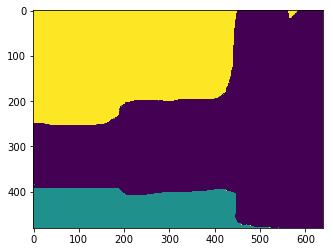

In [69]:
save_label_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch" 

#Define constants
row,col = gray.shape
num_classes = 3
thr = 255.0/num_classes 

#Sweep image folder
for filename in all_names_train_labels:
    
    filePath = os.path.join(train_labels_path, filename)
    #Read image
    im_l = cv2.imread(filePath)
    #RGb_to_gray
    gray = cv2.cvtColor(im_l, cv2.COLOR_BGR2GRAY) 
    #Define new image
    new_img = np.zeros((row,col), np.uint8)
    
    #Sweep rows, cols
    for i in range(row):
        for j in range(col):
            current_color = gray[i,j]
            #Tree classes - default class: 0
            if(thr <  current_color <= thr*2):
                new_img[i,j] = 1
            elif(thr*2 <  current_color):
                new_img[i,j] = 2

    #Save Image
    cv2.imwrite( os.path.join(save_label_path, filename) , new_img)

plt.imshow(new_img)
plt.show()
                    

# Explicacion de colores:
    
0: obstaculos - Rojo -  225 13 0
1: camino - verde -  149 255 0
2: fondo - blanco - 255 255 255


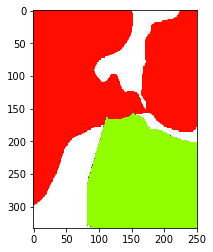

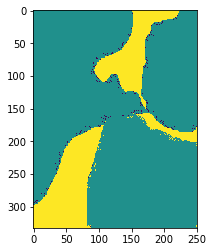

In [44]:
#normalizacion automática
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
a_img = np.array(gray, np.double)

normalized = cv2.normalize(gray, a_img, 0.0,2.0, cv2.NORM_MINMAX) 
#No funciona la normalizacion como esperamos, ya que une la clase de objetos con el camino, creo q es porque 
#la imagen no tiene 3 colores sino que tiene algunos puntos de otro color oscuro que interfieren en la normalizacion
plt.imshow(im[:,:,::-1])
plt.show()
plt.imshow(normalized)
plt.show()
                 


# -------------------------------------------
# Resize images and labels


In [61]:
train_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train"
train_labels_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch" 


all_names_train = os.listdir(train_path)

sort_nicely(all_names_train) 

img_cols = 480
img_rows = 360


In [35]:
#Sweep image folder
for filename in all_names_train:
    
    filePath = os.path.join(train_path, filename)
    filePath_l = os.path.join(train_labels_path, filename)
    
    #Read image
    im = cv2.imread(filePath)
    im_l = cv2.imread(filePath_l)
    
    #resize
    resized = cv2.resize(im ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
    resized_l = cv2.resize(im_l ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
    
    #Save Image
    cv2.imwrite( os.path.join(train_path, filename) , resized)
    cv2.imwrite( os.path.join(train_labels_path, filename) , resized_l)
            

In [45]:
#Sweep image folder
for filename in all_names_train:
    print ("/train_path/"+filename+" /train_labels_path/"+filename)

/train_path/frame0000.jpg /train_labels_path/frame0000.jpg
/train_path/frame0020.jpg /train_labels_path/frame0020.jpg
/train_path/frame0024.jpg /train_labels_path/frame0024.jpg
/train_path/frame0026.jpg /train_labels_path/frame0026.jpg
/train_path/frame0027.jpg /train_labels_path/frame0027.jpg
/train_path/frame0029.jpg /train_labels_path/frame0029.jpg
/train_path/frame0032.jpg /train_labels_path/frame0032.jpg
/train_path/frame0035.jpg /train_labels_path/frame0035.jpg
/train_path/frame0045.jpg /train_labels_path/frame0045.jpg
/train_path/frame0047.jpg /train_labels_path/frame0047.jpg
/train_path/frame0049.jpg /train_labels_path/frame0049.jpg
/train_path/frame0055.jpg /train_labels_path/frame0055.jpg
/train_path/frame0058.jpg /train_labels_path/frame0058.jpg
/train_path/frame0064.jpg /train_labels_path/frame0064.jpg
/train_path/frame0069.jpg /train_labels_path/frame0069.jpg
/train_path/frame0073.jpg /train_labels_path/frame0073.jpg
/train_path/frame0077.jpg /train_labels_path/frame0077.j

In [7]:
#---------------------------------- RESIZE other images-------------------

train_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_outside_data/outside_examp"

all_names_train = os.listdir(train_path)

sort_nicely(all_names_train) 

img_cols = 480
img_rows = 360

#Sweep image folder
for filename in all_names_train:
    
    filePath = os.path.join(train_path, filename)
    
    #Read image
    im = cv2.imread(filePath)
    
    #resize
    resized = cv2.resize(im ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
    
    #Save Image
    cv2.imwrite( os.path.join(train_path, filename) , resized)






# -------------------------------------------
# Split data: train and test


In [111]:
train_path =       "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_orig"
train_labels_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch_orig" 

save_train_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train" 
save_label_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch" 


save_test_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/test" 
save_test_label_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/test_labels_1ch" 

all_names_train = os.listdir(train_path)

sort_nicely(all_names_train) 


test_percent = 20

In [171]:
#Option 1

for filename in all_names_train:
    
    filePath = os.path.join(train_path, filename)
    filePath_l = os.path.join(train_labels_path, filename)
    
    #Read image
    im = cv2.imread(filePath)
    im_l = cv2.imread(filePath_l)
    
    if not(np.random.rand()  < 0.2):
        #train       
        #Save Image
        cv2.imwrite( os.path.join(save_train_path, filename) , im)
        cv2.imwrite( os.path.join(save_label_path, filename) , im_l)
            
    else:
        #test
        #Save Image
        cv2.imwrite( os.path.join(save_test_path, filename) , im)
        cv2.imwrite( os.path.join(save_test_label_path, filename) , im_l)    

In [ ]:
#Option 2

import random
import copy

cant_img = 100

imgs_test = int(test_percent*(100./cant_img))

rand_names = copy.copy(all_names_train)
random.shuffle(rand_names)

train = rand_names[imgs_test:]
test = rand_names[:imgs_test]

#..............

In [176]:
all_names_train = os.listdir(save_train_path)

sort_nicely(all_names_train)
all_names_train

for filename in all_names_train:
    print ("/train_path/"+filename+" /train_labels_path/"+filename)

/train_path/frame0000.jpg /train_labels_path/frame0000.jpg
/train_path/frame0020.jpg /train_labels_path/frame0020.jpg
/train_path/frame0026.jpg /train_labels_path/frame0026.jpg
/train_path/frame0027.jpg /train_labels_path/frame0027.jpg
/train_path/frame0029.jpg /train_labels_path/frame0029.jpg
/train_path/frame0035.jpg /train_labels_path/frame0035.jpg
/train_path/frame0045.jpg /train_labels_path/frame0045.jpg
/train_path/frame0047.jpg /train_labels_path/frame0047.jpg
/train_path/frame0058.jpg /train_labels_path/frame0058.jpg
/train_path/frame0064.jpg /train_labels_path/frame0064.jpg
/train_path/frame0069.jpg /train_labels_path/frame0069.jpg
/train_path/frame0077.jpg /train_labels_path/frame0077.jpg
/train_path/frame0082.jpg /train_labels_path/frame0082.jpg
/train_path/frame0087.jpg /train_labels_path/frame0087.jpg
/train_path/frame0092.jpg /train_labels_path/frame0092.jpg
/train_path/frame0096.jpg /train_labels_path/frame0096.jpg
/train_path/frame0103.jpg /train_labels_path/frame0103.j

# -------------------------------------------
# Accuracy metric


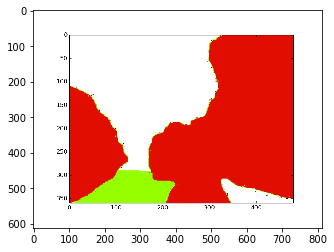

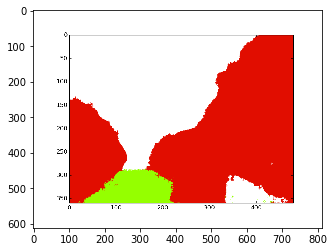

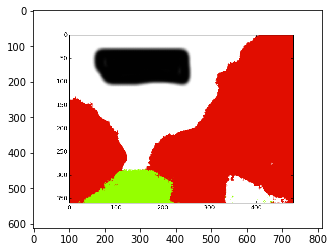

(612, 812, 3)

In [93]:
im_name1 = "figure_2.png"
im_name2 = "figure_3.png"
im_name3 = "figure_4.png"

im1 = cv2.imread(im_name1)
im2 = cv2.imread(im_name2)
im3 = cv2.imread(im_name3)

plt.imshow(im1[:,:,::-1])
plt.show()
plt.imshow(im2[:,:,::-1])
plt.show()
plt.imshow(im3[:,:,::-1])
plt.show()

im1.shape

In [58]:
diff = im1-im1

r,c,l = diff.shape

percent = 100.*(np.where(diff == 0)[0].shape[0])/(r*c*l)
print("percent 1 & 1: " , percent)


diff = im1-im2

percent = 100.*(np.where(diff == 0)[0].shape[0])/(r*c*l)
print("percent 1 & 2: " , percent)

diff = im1-im3

percent = 100.*(np.where(diff == 0)[0].shape[0])/(r*c*l)
print("percent 1 & 3: " , percent)

('percent 1 & 1: ', 100.0)
('percent 1 & 2: ', 95.20824613370252)
('percent 1 & 3: ', 88.9974859675671)


In [69]:
np.where((diff == 0) | (abs(diff)<1e-07))

(array([  0,   0,   0, ..., 611, 611, 611]),
 array([  0,   0,   0, ..., 811, 811, 811]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [66]:
a = np.array([7.01231118e-09, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
a = np.rint(a)

a

array([ 0., -2., -0.,  0.,  2.,  2.,  2.])

In [100]:
(im1&im2)

k = np.equal(im1,im3)



100.*(np.where(k == True)[0].shape[0])/(r*c*l)

88.9974859675671

In [32]:
from numpy import linalg as LA
a = np.arange(9) - 4
print(a)

b = a.reshape((3, 3))
print(b)




[-4 -3 -2 -1  0  1  2  3  4]
[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]


In [35]:
LA.norm(a)


7.745966692414834